<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [6]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 1: Load the dataset


In [7]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




/tmp/ipykernel_299/3337513883.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['AgeNumeric'] = df['Age'].replace(age_mapping)


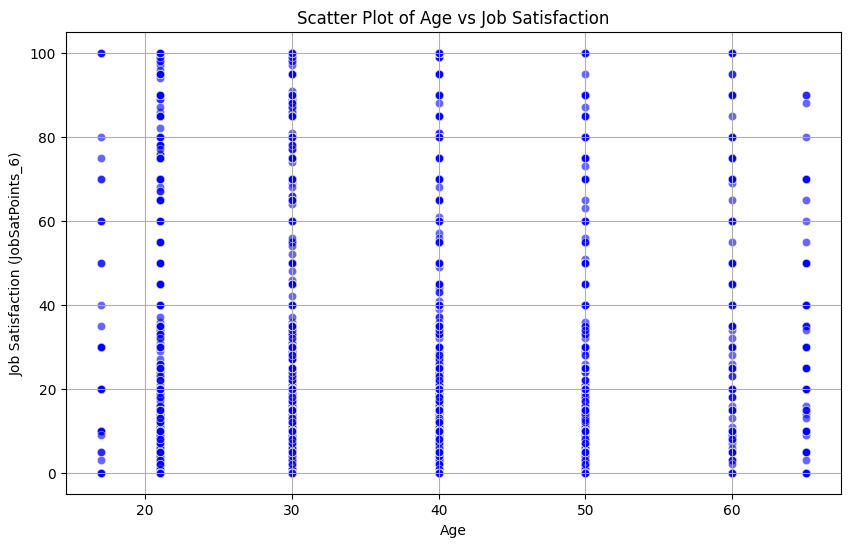

In [9]:

# Remove rows where Age or JobSatPoints_6 is missing
df = df.dropna(subset=["Age", "JobSatPoints_6"])
df = df[df['Age'] != 'Prefer not to say']

# Convert Age into numeric values (if it's in categorical format)
age_mapping = {
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "Under 18 years old": 17,
    "65 years or older": 65
}
df['AgeNumeric'] = df['Age'].replace(age_mapping)

# Create a scatter plot of Age vs JobSatPoints_6
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['AgeNumeric'], y=df['JobSatPoints_6'], color='blue', alpha=0.6)

# Customize the plot
plt.xlabel("Age")
plt.ylabel("Job Satisfaction (JobSatPoints_6)")
plt.title("Scatter Plot of Age vs Job Satisfaction")
plt.grid(True)

# Show the plot
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


In [11]:
def remove_outliers_iqr(df, column_name):
    """
    Removes outliers from a DataFrame column using the IQR method.
    
    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - column_name (str): The column name to check for outliers.
    >
    Returns:
    - df_cleaned (DataFrame): The DataFrame with outliers removed.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds to detect outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers: Keep rows where the column value is between the lower and upper bounds
    df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_cleaned

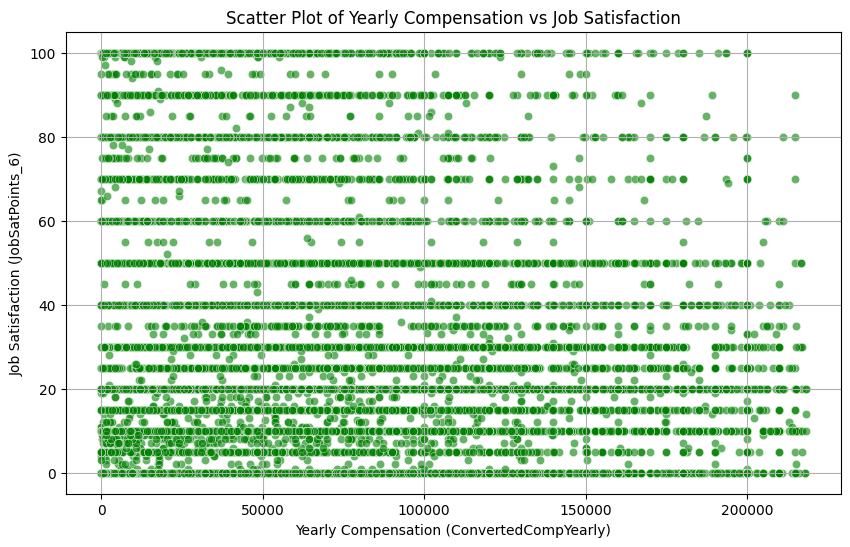

In [12]:
# Remove rows where ConvertedCompYearly or JobSatPoints_6 is missing
df = df.dropna(subset=["ConvertedCompYearly", "JobSatPoints_6"])

df = remove_outliers_iqr(df,"ConvertedCompYearly")

# Create a scatter plot of ConvertedCompYearly vs JobSatPoints_6
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['ConvertedCompYearly'], y=df['JobSatPoints_6'], color='green', alpha=0.6)

# Customize the plot
plt.xlabel("Yearly Compensation (ConvertedCompYearly)")
plt.ylabel("Job Satisfaction (JobSatPoints_6)")
plt.title("Scatter Plot of Yearly Compensation vs Job Satisfaction")
plt.grid(True)

# Show the plot
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


/tmp/ipykernel_299/1172643134.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['AgeNumeric'] = df['Age'].replace(age_mapping)


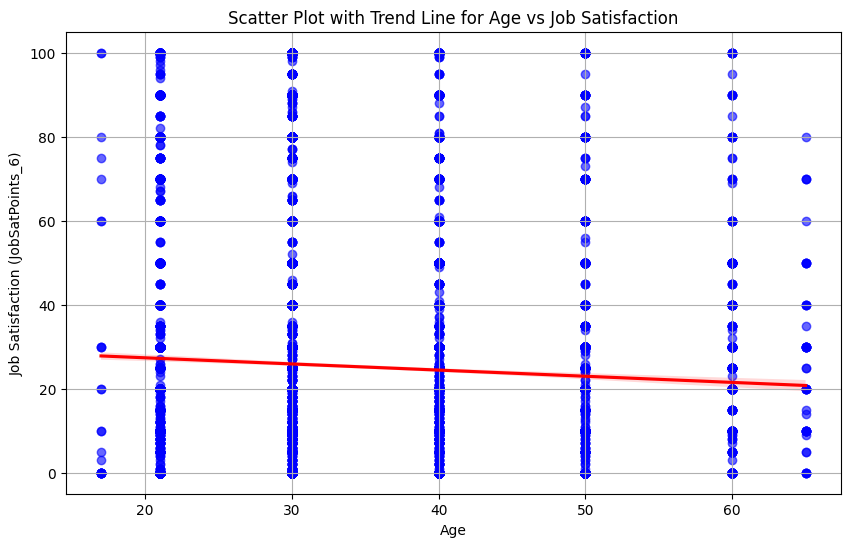

In [13]:

# Remove rows where Age or JobSatPoints_6 is missing
df = df.dropna(subset=["Age", "JobSatPoints_6"])
df = df[df['Age'] != 'Prefer not to say']

# Convert Age into numeric values (if it's in categorical format)
age_mapping = {
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "Under 18 years old": 17,
    "65 years or older": 65
}
df['AgeNumeric'] = df['Age'].replace(age_mapping)

# Create a scatter plot with a regression line (trend line) for Age vs JobSatPoints_6
plt.figure(figsize=(10, 6))
sns.regplot(x=df['AgeNumeric'], y=df['JobSatPoints_6'], scatter_kws={'color': 'blue', 'alpha': 0.6}, line_kws={'color': 'red'})

# Customize the plot
plt.xlabel("Age")
plt.ylabel("Job Satisfaction (JobSatPoints_6)")
plt.title("Scatter Plot with Trend Line for Age vs Job Satisfaction")
plt.grid(True)

# Show the plot
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


/tmp/ipykernel_299/877874542.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['AgeNumeric'] = df['Age'].replace(age_mapping)


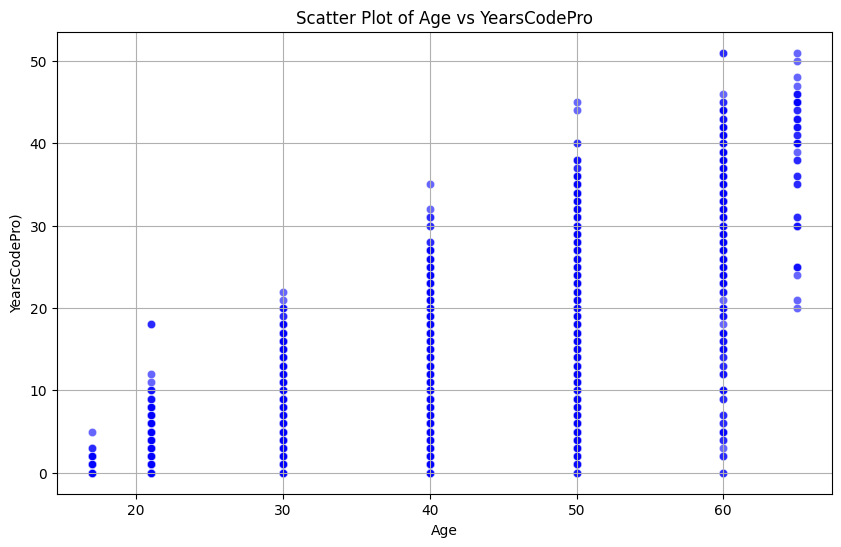

In [15]:
# Remove rows where Age or JobSatPoints_6 is missing
df = df.dropna(subset=["Age", "YearsCodePro"])
df = df[df['Age'] != 'Prefer not to say']

# Convert categorical experience values to numeric
mapping = {
    "Less than 1 year": 0,
    "More than 50 years": 51
}
df["YearsCodePro"] = df["YearsCodePro"].replace(mapping)
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")  # Convert to numeric

# Convert Age into numeric values (if it's in categorical format)
age_mapping = {
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "Under 18 years old": 17,
    "65 years or older": 65
}
df['AgeNumeric'] = df['Age'].replace(age_mapping)

# Create a scatter plot of Age vs YearsCodePro
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['AgeNumeric'], y=df['YearsCodePro'], color='blue', alpha=0.6)

# Customize the plot
plt.xlabel("Age")
plt.ylabel("YearsCodePro)")
plt.title("Scatter Plot of Age vs YearsCodePro")
plt.grid(True)

# Show the plot
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


/tmp/ipykernel_299/1813448108.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['AgeNumeric'] = df['Age'].replace(age_mapping)


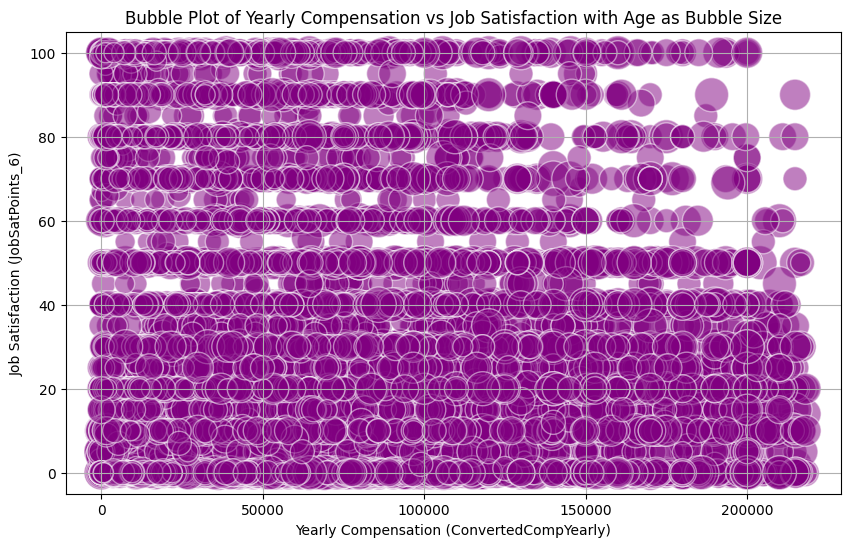

In [16]:
# Remove rows where any of the required columns is missing
df = df.dropna(subset=["ConvertedCompYearly", "JobSatPoints_6", "Age"])
df = df[df['Age'] != 'Prefer not to say']

# Convert Age into numeric values (if it's in categorical format)
age_mapping = {
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "Under 18 years old": 17,
    "65 years or older": 65
}
df['AgeNumeric'] = df['Age'].replace(age_mapping)

# Create a bubble plot with ConvertedCompYearly on x-axis, JobSatPoints_6 on y-axis, and bubble size as Age
plt.figure(figsize=(10, 6))
plt.scatter(
    x=df['ConvertedCompYearly'],
    y=df['JobSatPoints_6'],
    s=df['AgeNumeric']*10,  # Scale bubble size by AgeNumeric (multiply by a factor for visibility)
    alpha=0.5,              # Set transparency of bubbles
    color='purple',         # Set bubble color
    edgecolors="w",         # Add white edge color for bubbles
)

# Customize the plot
plt.xlabel("Yearly Compensation (ConvertedCompYearly)")
plt.ylabel("Job Satisfaction (JobSatPoints_6)")
plt.title("Bubble Plot of Yearly Compensation vs Job Satisfaction with Age as Bubble Size")
plt.grid(True)

# Show the plot
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


In [17]:
df['LanguageHaveWorkedWith'].value_counts(dropna = False)

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                   293
C#;HTML/CSS;JavaScript;SQL;TypeScript                            156
Python                                                           148
HTML/CSS;JavaScript;PHP;SQL                                      126
Python;SQL                                                       124
                                                                ... 
Solidity                                                           1
C#;C++;Go;Java;Python;SQL;TypeScript                               1
Go;Java;Kotlin;TypeScript;Zig                                      1
Bash/Shell (all shells);C;C++;Groovy;Java;PowerShell;Ruby;SQL      1
Bash/Shell (all shells);Elixir;Go;HTML/CSS;JavaScript;PHP;SQL      1
Name: count, Length: 7509, dtype: int64

10.0


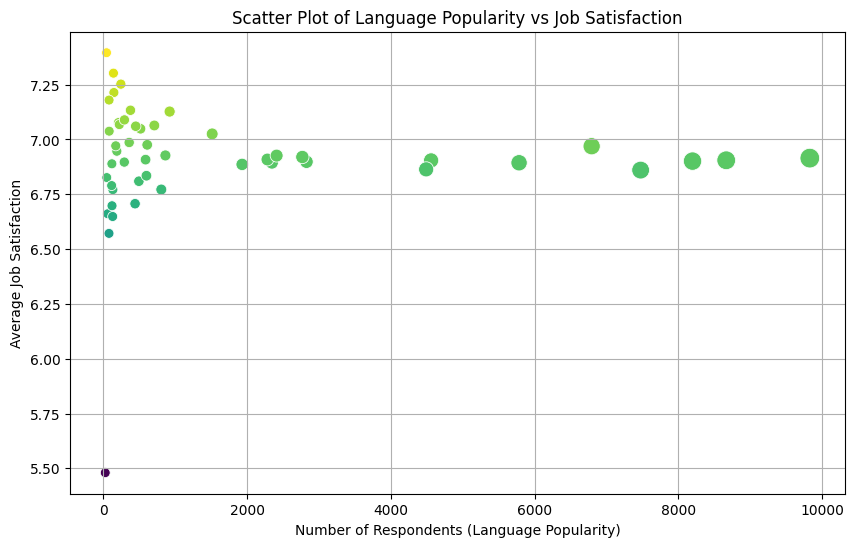

In [24]:
# Remove rows with missing data
df = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSat'])
print(df.loc[72,'JobSat'])
# Split the 'LanguageHaveWorkedWith' column into individual languages
languages_series = df['LanguageHaveWorkedWith'].str.split(';').explode()
#languages_series
# Create a new DataFrame for language and job satisfaction
language_df = pd.DataFrame({'Language': languages_series, 'JobSat': df.loc[languages_series.index, 'JobSat'].values})

# Group by language and calculate the count and average job satisfaction
language_grouped = language_df.groupby('Language').agg(
    num_respondents=('Language', 'size'),
    avg_job_satisfaction=('JobSat', 'mean')
).reset_index()

# Plot the scatter plot with number of respondents vs. average job satisfaction
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=language_grouped['num_respondents'],
    y=language_grouped['avg_job_satisfaction'],
    hue=language_grouped['avg_job_satisfaction'],  # Color points by job satisfaction
    size=language_grouped['num_respondents'],     # Size of points by number of respondents
    sizes=(50, 200),                             # Size range for the bubbles
    palette='viridis',
    legend=None
)

# Customize the plot
plt.xlabel('Number of Respondents (Language Popularity)')
plt.ylabel('Average Job Satisfaction')
plt.title('Scatter Plot of Language Popularity vs Job Satisfaction')
plt.grid(True)

# Show the plot
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


/tmp/ipykernel_299/3945694402.py:6: UserWarning: 
The markers list has fewer values (5) than needed (46) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(
/tmp/ipykernel_299/3945694402.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


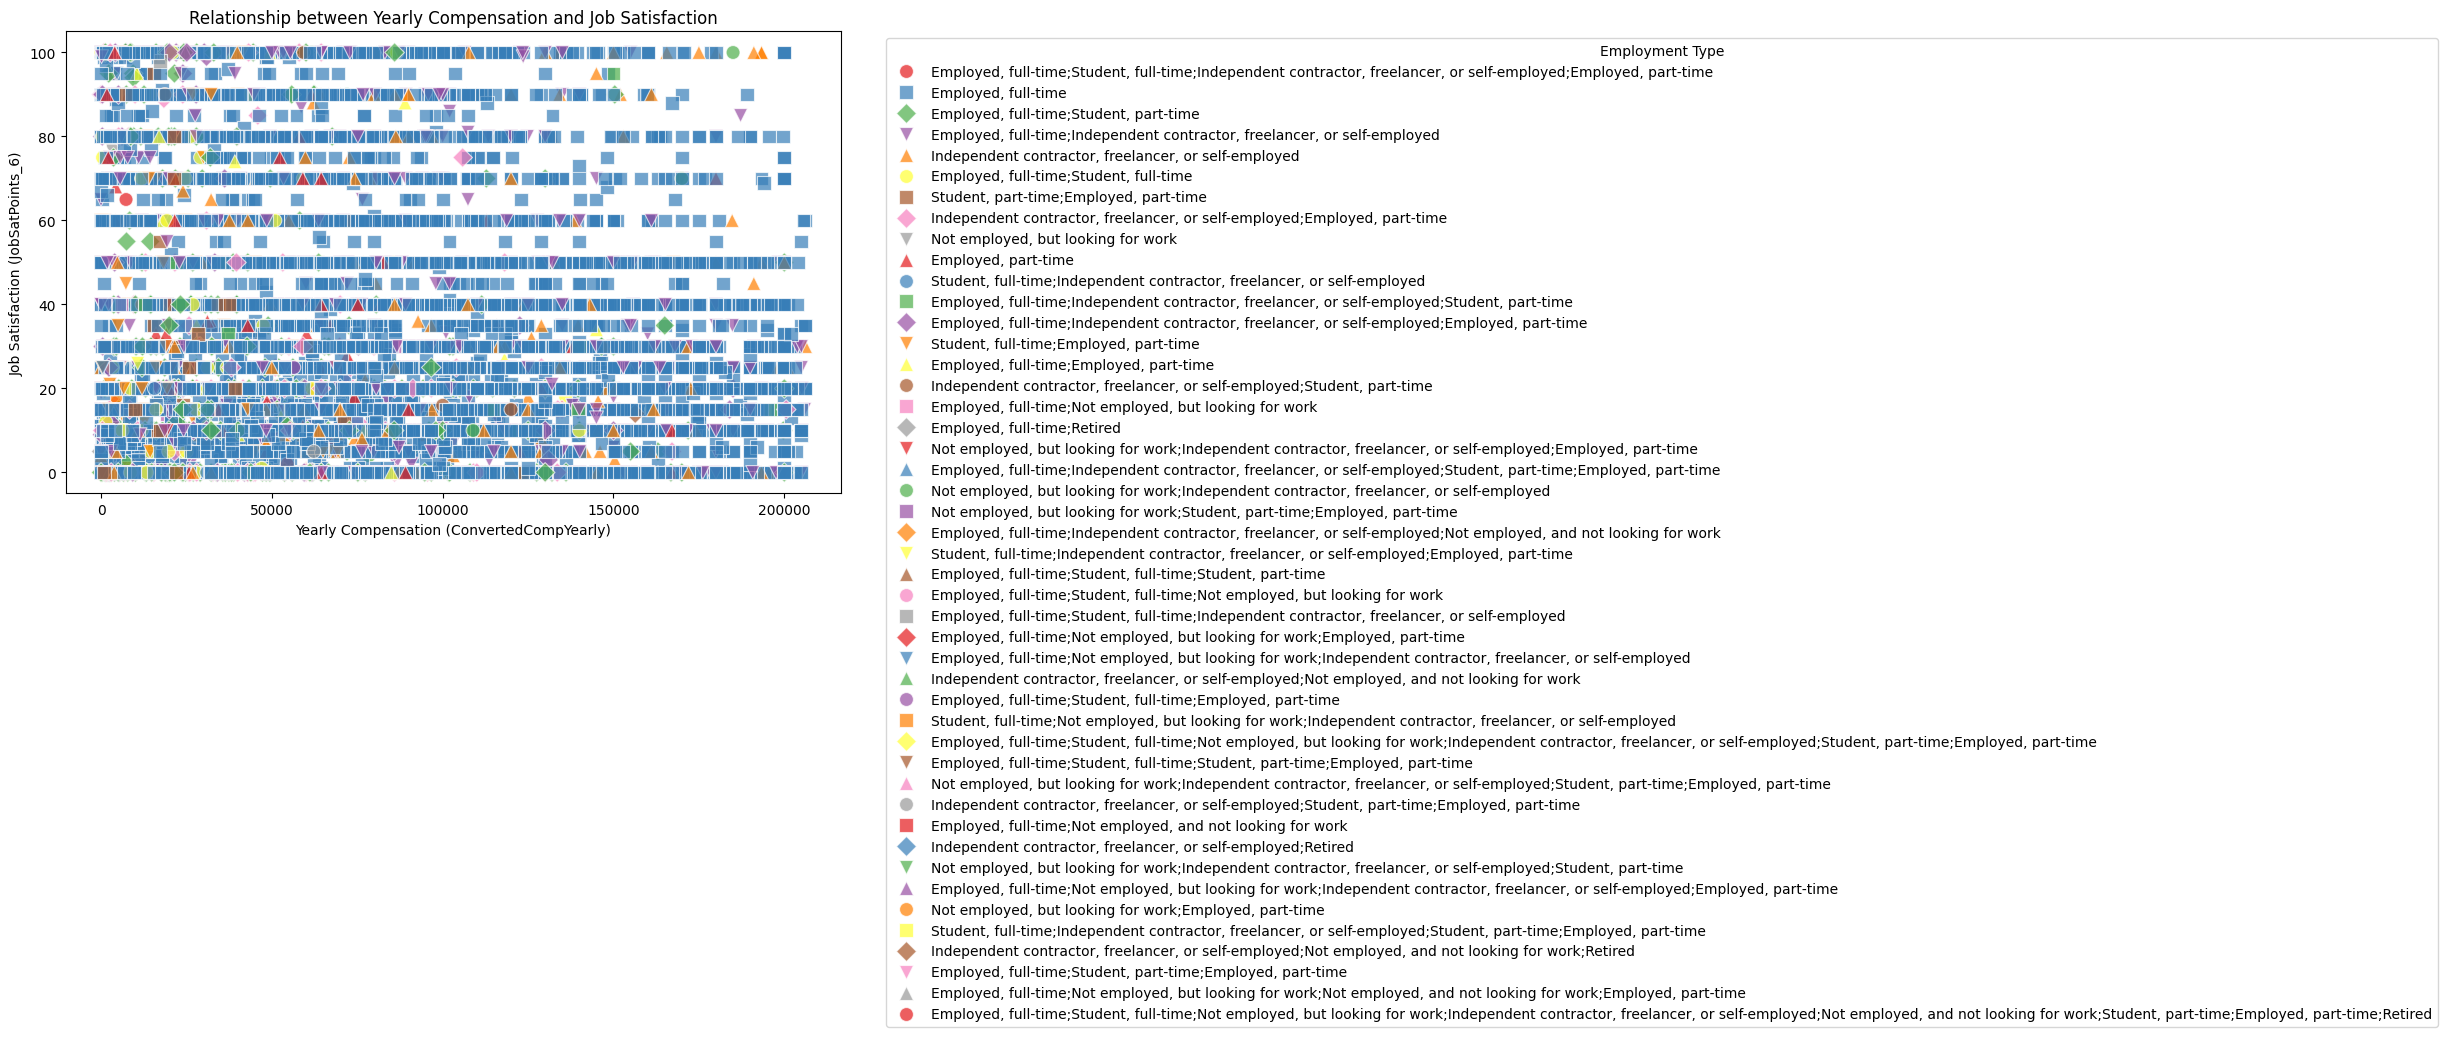

In [25]:

df = remove_outliers_iqr(df,'ConvertedCompYearly')

# Scatter plot with color coding by Employment type
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='ConvertedCompYearly', 
    y='JobSatPoints_6', 
    data=df, 
    hue='Employment',  # Color by Employment type
    palette='Set1',  # Set color palette
    style='Employment',  # Different markers for different employment types
    markers=['o', 's', 'D', 'v', '^'],  # Use different markers
    s=100,  # Size of the points
    alpha=0.7  # Transparency
)

# Customize the plot
plt.title('Relationship between Yearly Compensation and Job Satisfaction')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


/tmp/ipykernel_299/2150805123.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['AgeNumeric'] = df['Age'].replace(age_mapping)
/tmp/ipykernel_299/2150805123.py:27: UserWarning: 
The markers list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(
/tmp/ipykernel_299/2150805123.py:46: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


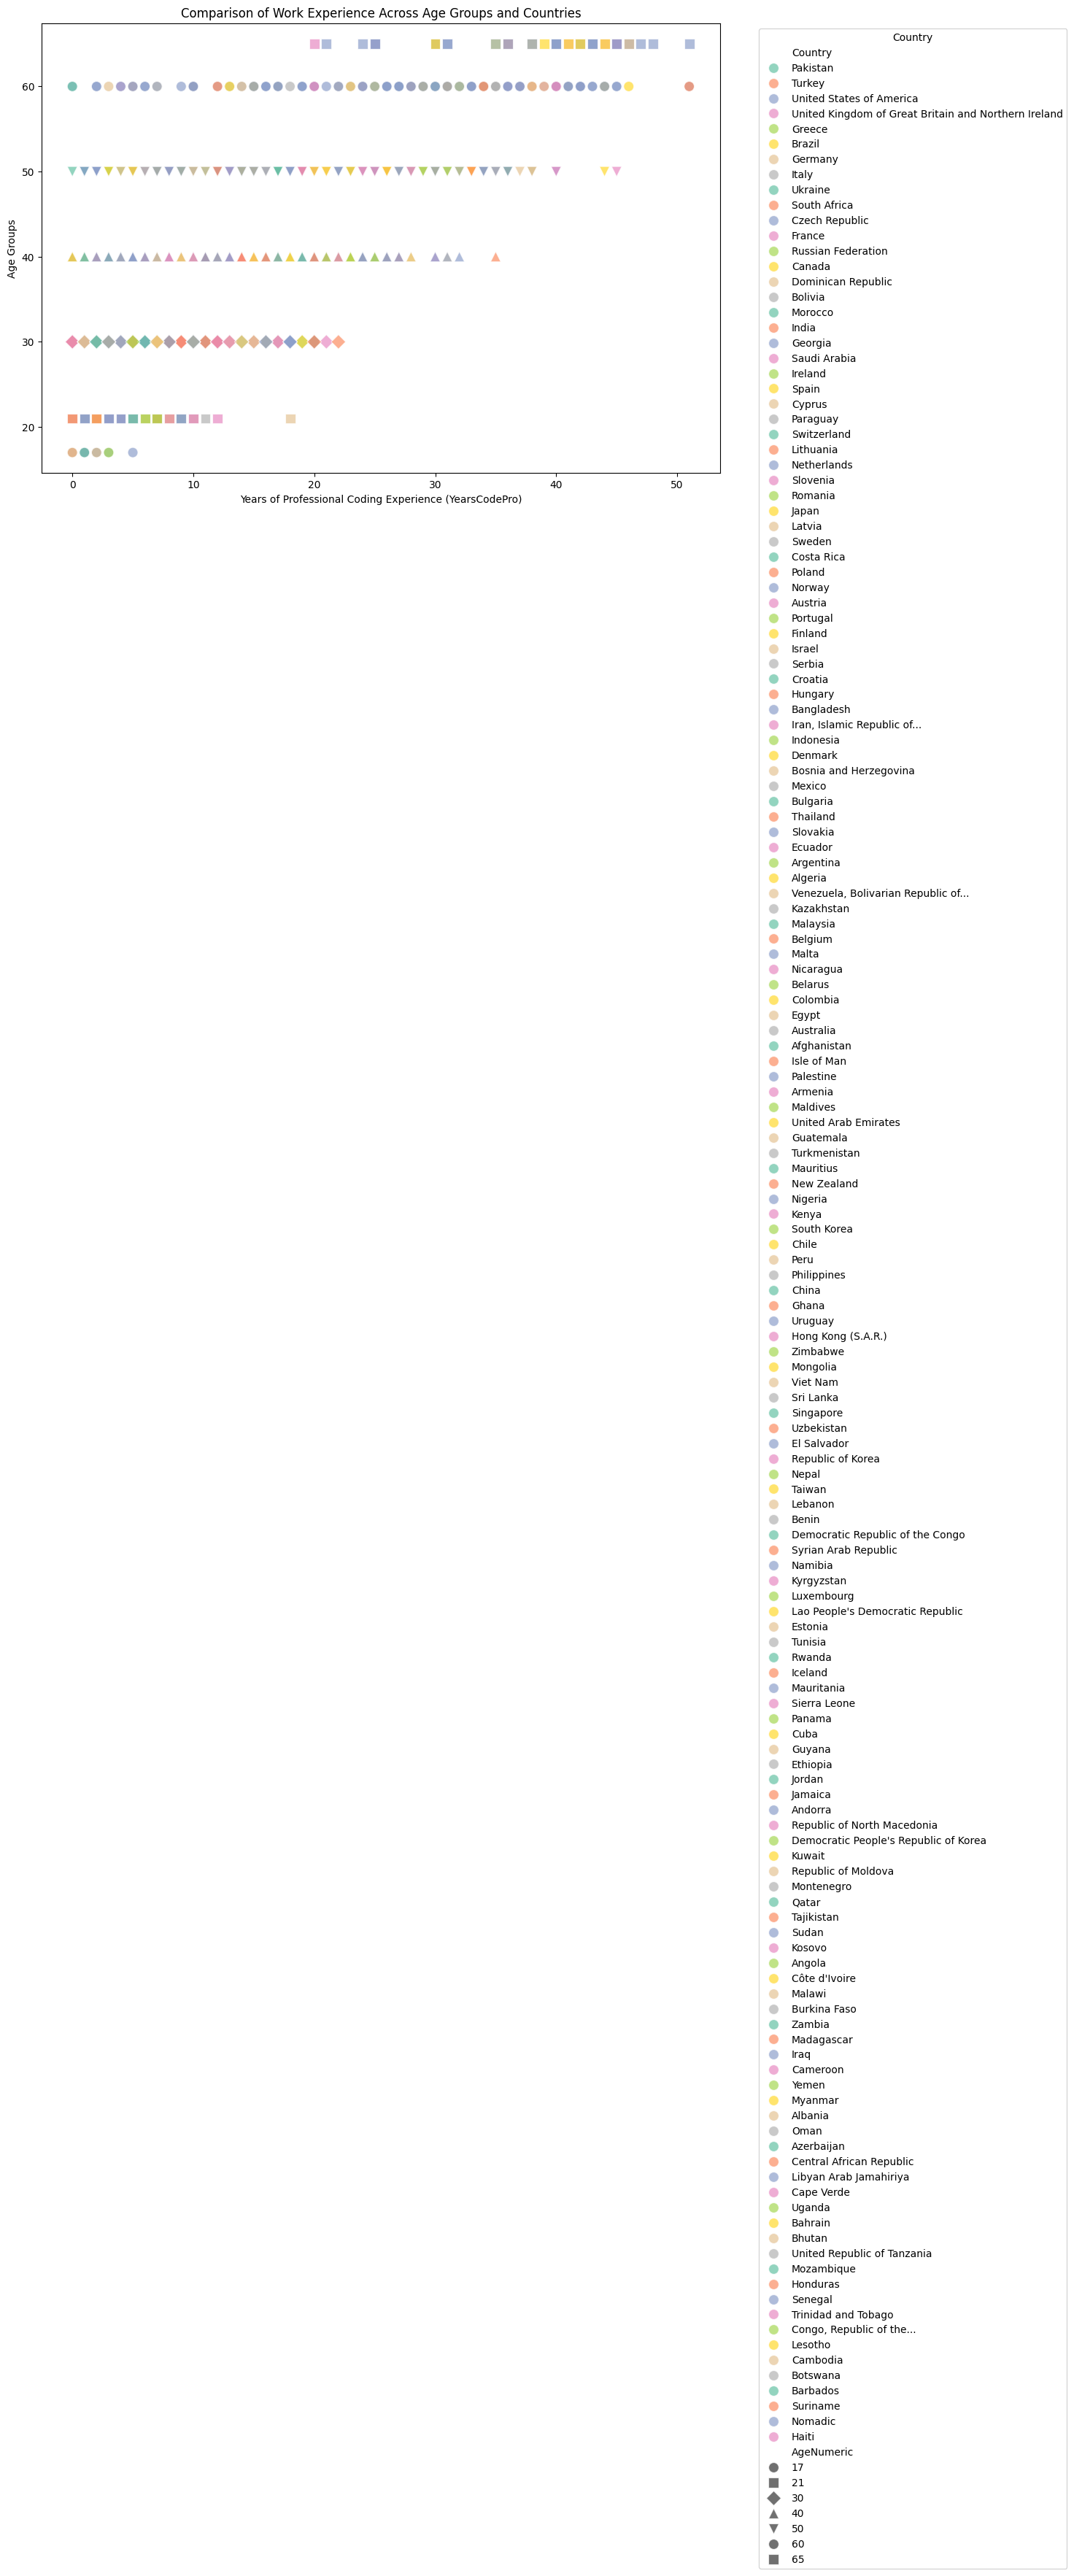

In [27]:
df = df.dropna(subset=["YearsCodePro", "Age", "Country"])
df = df[df['Age'] != 'Prefer not to say']

# Convert Age into numeric values (if it's in categorical format)
age_mapping = {
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "Under 18 years old": 17,
    "65 years or older": 65
}
df['AgeNumeric'] = df['Age'].replace(age_mapping)

# Convert categorical experience values to numeric
mapping = {
    "Less than 1 year": 0,
    "More than 50 years": 51
}
df["YearsCodePro"] = df["YearsCodePro"].replace(mapping)
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")  # Convert to numeric

# Scatter plot with color by Country and markers by Age
plt.figure(figsize=(12, 8))

sns.scatterplot(
    x='YearsCodePro',  # Work experience
    y='AgeNumeric',  # Age group
    data=df,  # Data frame
    hue='Country',  # Color by Country
    style='AgeNumeric',  # Different markers for Age groups
    palette='Set2',  # Color palette
    markers=['o', 's', 'D', '^', 'v'],  # Use different markers for each Age group
    s=100,  # Size of the points
    alpha=0.7  # Transparency of points
)

# Customize the plot
plt.title('Comparison of Work Experience Across Age Groups and Countries')
plt.xlabel('Years of Professional Coding Experience (YearsCodePro)')
plt.ylabel('Age Groups')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
